In [178]:
import numpy as np

In [179]:
import seaborn as sns

In [180]:
import matplotlib.pyplot as plt

In [181]:
%matplotlib inline

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [183]:
customers = pd.read_csv('Ecommerce Customers.csv')

In [184]:
customers.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [185]:
customers.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [186]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

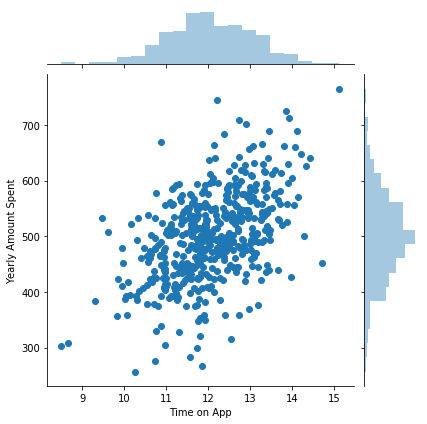

In [187]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])

In [188]:
customers['Time on App'].corr(customers['Yearly Amount Spent'])

0.4993277700534505

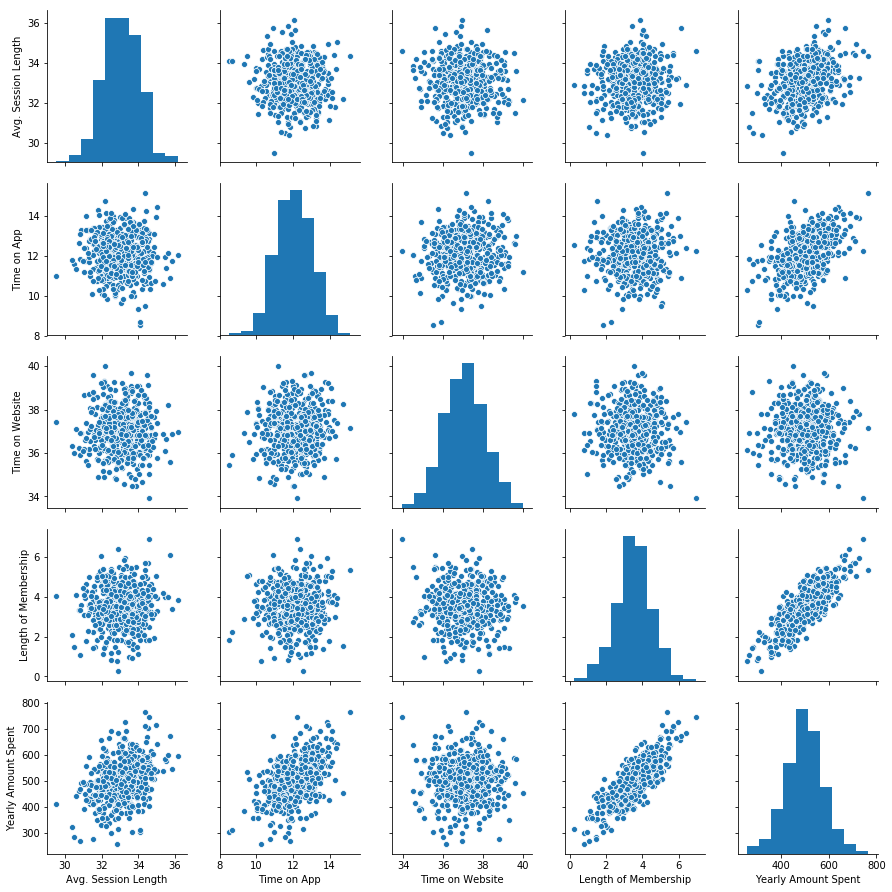

In [189]:
sns.pairplot(customers)

In [190]:
customers.corr()

Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000

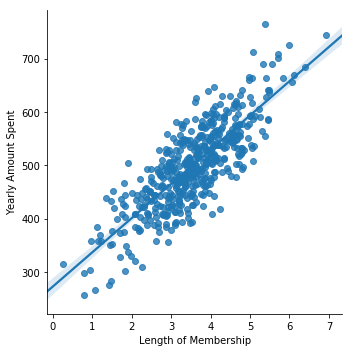

In [191]:
sns.lmplot('Length of Membership', 'Yearly Amount Spent', data=customers)

In [192]:
x = customers[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [193]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=101)

In [194]:
lm = LinearRegression()

In [195]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [196]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [197]:
predictions = lm.predict(x_test)

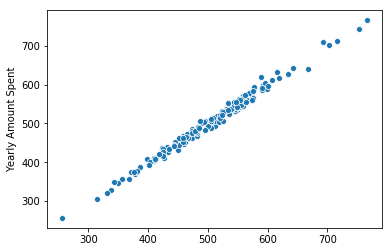

In [198]:
sns.scatterplot(predictions,y_test)

In [199]:
from sklearn import metrics

In [200]:
metrics.mean_absolute_error(predictions, y_test)

7.228148653430835

In [201]:
metrics.mean_squared_error(predictions,y_test)

79.81305165097467

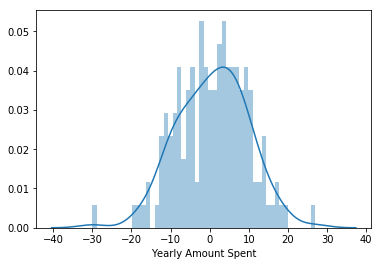

In [202]:
sns.distplot(predictions-y_test,bins=50)

In [203]:
coefficiences = pd.DataFrame(lm.coef_, x.columns, columns=['coe'])


In [204]:
coefficiences

coe
Avg. Session Length   25.981550
Time on App           38.590159
Time on Website        0.190405
Length of Membership  61.279097

In [205]:
x = customers[['Length of Membership']]
y = customers['Yearly Amount Spent']

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=101)

In [207]:
lm = LinearRegression()

In [208]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [209]:
lm.coef_

array([63.15221957])

In [210]:
predictions = lm.predict(x_test)

In [211]:
metrics.mean_absolute_error(predictions,y_test)

40.90606096474334

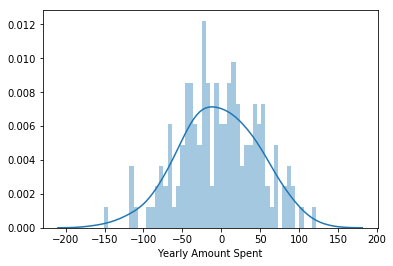

In [212]:
sns.distplot(predictions-y_test,bins=50)

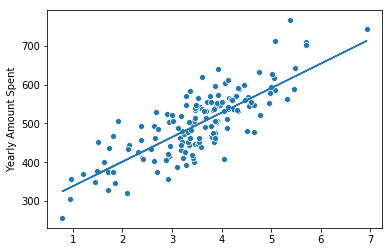

In [241]:
sns.scatterplot(x_test.values.reshape(1,-1)[0],y_test)
# type(y_test.values)
plt.plot(x_test.values,predictions)
# x_test.values
# x_test.values
# y_test.values.shape


In [172]:
lm.intercept_

275.0606819293018